In [520]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import itertools

from lattice import NuclearLattice
from interactions import get_full_interaction

import data.data
import interactions
import lattice
import importlib
importlib.reload(lattice)
importlib.reload(interactions)
importlib.reload(data.data)

<module 'data.data' from '/Users/jamesmcgreivy/Desktop/LatticeNuclearModel/data/data.py'>

In [521]:
def get_interactions(a_mm_0, a_mm_1, a_mm_2, a_mm_3, a_mm_4,
                     a_mp_0, a_mp_1, a_mp_2, a_mp_3, a_mp_4,
                     a_pm_0, a_pm_1, a_pm_2, a_pm_3, a_pm_4,
                             a_pp_1, a_pp_2, a_pp_3, a_pp_4,
                     a_c_1, a_c_2):
    a_pp_0 = a_pp_1
    # Package into lists
    a_list_mm = [a_mm_0, a_mm_1, a_mm_2, a_mm_3, a_mm_4]
    a_list_mp = [a_mp_0, a_mp_1, a_mp_2, a_mp_3, a_mp_4]
    a_list_pm = [a_pm_0, a_pm_1, a_pm_2, a_pm_3, a_pm_4]
    a_list_pp = [a_pp_0, a_pp_1, a_pp_2, a_pp_3, a_pp_4]
    a_list_coulomb = [a_c_1, a_c_2]
    
    return interactions.get_nuclear_interaction(a_list_mm), interactions.get_nuclear_interaction(a_list_mp), interactions.get_nuclear_interaction(a_list_pm), interactions.get_nuclear_interaction(a_list_pp), interactions.get_coulomb_interaction(a_list_coulomb), interactions.get_full_interaction(a_list_mm, a_list_mp, a_list_pm, a_list_pp, a_list_coulomb)
    

In [522]:
best = {"target": -3.741057959599389, "params": {"a_c_1": 20.0, "a_c_2": 9.061820914407201, "a_mm_0": 18.222276870929907, "a_mm_1": 3.180466219643856, "a_mm_2": 0.6621021072830576, "a_mm_3": 13.277479119858272, "a_mm_4": -1.5506242054277408, "a_mp_0": 12.613459464162101, "a_mp_1": 8.539650762231242, "a_mp_2": -5.8825194664343465, "a_mp_3": 13.127509912969138, "a_mp_4": -0.784514676731223, "a_pm_0": -26.68874917522244, "a_pm_1": -8.78673345147699, "a_pm_2": 8.53343913225144, "a_pm_3": -8.881605338478245, "a_pm_4": 3.8413119422279367, "a_pp_1": 19.177766658792983, "a_pp_2": 6.515611283281839, "a_pp_3": 17.29272135393137, "a_pp_4": 12.943613081630978}, "datetime": {"datetime": "2024-07-12 00:49:41", "elapsed": 45748.108213, "delta": 1367.894783}}

f_nuclear_mm, f_nuclear_mp, f_nuclear_pm, f_nuclear_pp, f_coulomb, f_full = get_interactions(**best["params"])

<>:11: SyntaxWarning: invalid escape sequence '\c'
<>:16: SyntaxWarning: invalid escape sequence '\c'
<>:21: SyntaxWarning: invalid escape sequence '\c'
<>:26: SyntaxWarning: invalid escape sequence '\c'
<>:11: SyntaxWarning: invalid escape sequence '\c'
<>:16: SyntaxWarning: invalid escape sequence '\c'
<>:21: SyntaxWarning: invalid escape sequence '\c'
<>:26: SyntaxWarning: invalid escape sequence '\c'
/var/folders/66/dcsv62x14w98n4s5n8mdhpvc0000gn/T/ipykernel_81142/1372527624.py:11: SyntaxWarning: invalid escape sequence '\c'
  axs[0,0].set_title("Nuclear Force, $s \cdot s < 0, i \cdot i < 0$")
/var/folders/66/dcsv62x14w98n4s5n8mdhpvc0000gn/T/ipykernel_81142/1372527624.py:16: SyntaxWarning: invalid escape sequence '\c'
  axs[0,1].set_title("Nuclear Force, $s \cdot s < 0, i \cdot i > 0$")
/var/folders/66/dcsv62x14w98n4s5n8mdhpvc0000gn/T/ipykernel_81142/1372527624.py:21: SyntaxWarning: invalid escape sequence '\c'
  axs[0,2].set_title("Nuclear Force, $s \cdot s > 0, i \cdot i < 0$")
/

Text(0.5, 1.0, 'Coulomb Force')

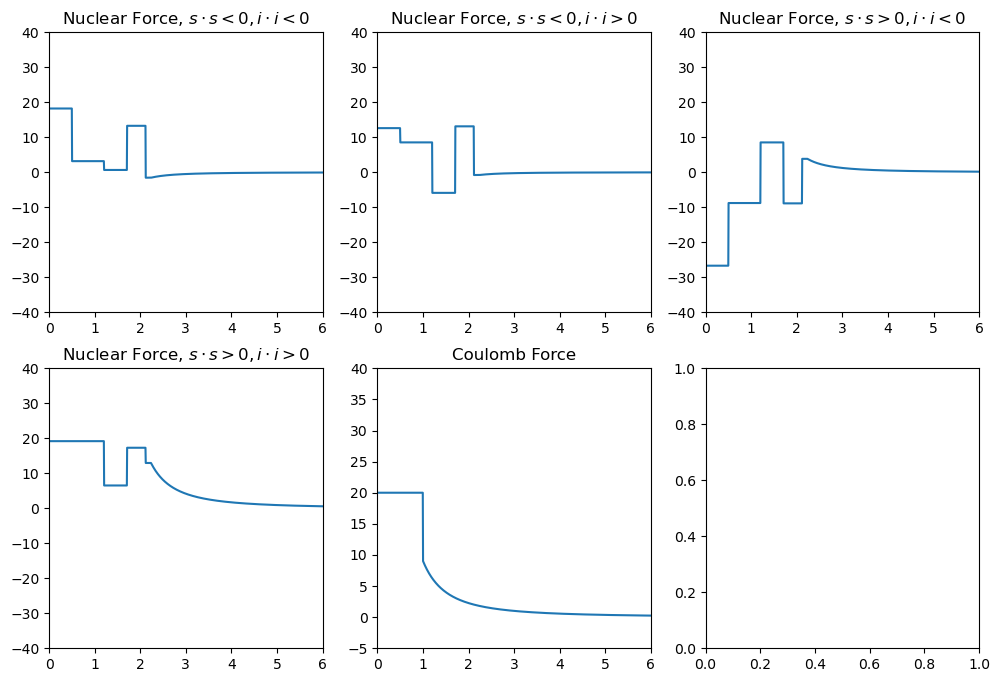

In [527]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

x = np.linspace(0, 6, 1000)

y_lim = (-40, 40)
y_lim_c = (-5, 40)

axs[0,0].plot(x, [f_nuclear_mm(_) for _ in x])
axs[0,0].set_ylim(*y_lim)
axs[0,0].set_xlim(0, 6)
axs[0,0].set_title("Nuclear Force, $s \cdot s < 0, i \cdot i < 0$")

axs[0,1].plot(x, [f_nuclear_mp(_) for _ in x])
axs[0,1].set_ylim(*y_lim)
axs[0,1].set_xlim(0, 6)
axs[0,1].set_title("Nuclear Force, $s \cdot s < 0, i \cdot i > 0$")

axs[0,2].plot(x, [f_nuclear_pm(_) for _ in x])
axs[0,2].set_ylim(*y_lim)
axs[0,2].set_xlim(0, 6)
axs[0,2].set_title("Nuclear Force, $s \cdot s > 0, i \cdot i < 0$")

axs[1,0].plot(x, [f_nuclear_pp(_) for _ in x])
axs[1,0].set_ylim(*y_lim)
axs[1,0].set_xlim(0, 6)
axs[1,0].set_title("Nuclear Force, $s \cdot s > 0, i \cdot i > 0$")

axs[1,1].plot(x, [f_coulomb(_) for _ in x])
axs[1,1].set_ylim(*y_lim_c)
axs[1,1].set_xlim(0, 6)
axs[1,1].set_title("Coulomb Force")

In [534]:
Z = 20
N = 20

lat = lattice.NuclearLattice(Z, N, f_full, lattice_width=13, state_space_dim=3); lat.step(); lat.step(); lat.step(); lat.step(); print(lat.E_tot())

tensor(94.3227, dtype=torch.float64)
